In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load data
data = load_breast_cancer()

# Create DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
x = df.drop('target', axis=1)
y = df['target']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [7]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
base_model = DecisionTreeClassifier(max_depth=1)

ada_model = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

In [9]:
ada_model.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [10]:
y_pred = ada_model.predict(x_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


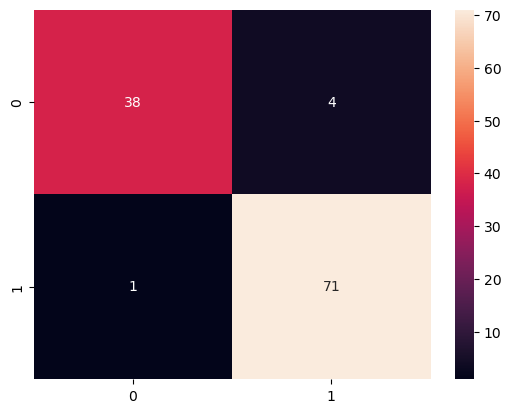

In [12]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 1]
}

grid = GridSearchCV(
    AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1)),
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'learning_rate': 1, 'n_estimators': 100}


In [15]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [17]:

new_data = [[
    14.2, 20.5, 92.0, 620.0, 0.085, 0.065, 0.045, 0.035, 0.18, 0.055,
    0.35, 1.1, 2.6, 28.0, 0.005,
    0.015, 0.020, 0.010, 0.020, 0.003,
    16.0, 25.0, 105.0, 850.0, 0.120,
    0.150, 0.160, 0.080, 0.280, 0.075
]]
new=scaler.transform(new_data)
ada_model.predict(new)



c:\Users\husna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])